**Autor**: *Julián David León Quintero*  

<style>
  .centered {
    text-align: center;
  }
</style>

# <div class="centered">**Simulation of the atmospheric attenuation**</div>

## ***Importación de Librerías***

In [2]:
import py4cats
from py4cats import dod2ri, riPlot,lbl2xs,lbl2ac, lbl2od, atmRead, atmPlot, higstract, atlas, xsPlot, dod2ri

## ***Lectura de los datos***

In [3]:
# Definir el rango espectral (con padding manual)
wn_min = 2000.0 - 20  # 1980 cm⁻¹
wn_max = 3000.0 + 20  # 3020 cm⁻¹

# Pasa los límites como una tupla
lines_main = higstract(
    '680HIT86b.par',  # ruta a tu archivo .par
    (wn_min, wn_max)  # tupla con el límite inferior y superior
)

print(lines_main)

 WARNING --- hitran.bisect_first_line:   requested spectral range  1980.000000 --- 3020.000000     only partly in database  2000.000900 --- 2999.999700
# first line in spectral range at record number 1 found in 8307.849691463 sec
 b' 31 2000.001500 9.862E-26 1.522E+00.06790.086 2499.17140.760.000000'
# last  line     accepted 
 b' 31 2999.999700 3.329E-25 5.162E-02.06580.073 1323.00850.76-.008000'

 370725 lines of  6  molecule(s) extracted from  680HIT86b.par
 returning a dictionary of lineArray's for  O3 CO CH4 CO2 H2O N2O
{'O3': lineArray([(2000.0015, 9.862e-26, 2499.1714, 0.0679, 0.76, 0.086, 1.,  0.   ),
           (2000.0019, 1.572e-25, 1128.2656, 0.0863, 0.76, 0.105, 1.,  0.   ),
           (2000.0076, 1.471e-24, 1963.3028, 0.0709, 0.8 , 0.08 , 1.,  0.   ),
           ...,
           (2999.9909, 2.859e-24, 1183.7848, 0.0658, 0.74, 0.081, 1., -0.008),
           (2999.9988, 5.098e-24, 1154.0233, 0.0643, 0.72, 0.083, 1., -0.008),
           (2999.9997, 3.329e-25, 1323.0085, 0.0658

## ***Parámetros***

In [4]:
# Calcular la sección cruzada usando lbl2xs con el espectro (dll) y el perfil (mls)
pressure_fixed = 1013.25  # en mb
temperature_fixed = 296.0   # en K

# Parámetros espectrales para lbl2xs
line_shape = "Voigt"     # Perfil de línea deseado
sampling = 10.0           # Tasa de muestreo
n_grids = 3              # Número de grids
grid_ratio = 8           # Relación entre grids
n_widths = 25.0          # Límites del grid fino
lagrange = 2             # Interpolación de Lagrange
verbose = True           # Salida detallada

## ***Atmosferic Reading***

In [5]:
mls = atmRead('data_and_doc/data/atmos/20/mls.xy', zToA=100)
dll = lines_main

 Atmos1d: got p, T, air   and 8 molecules on 20 levels
 WARNING --- atmTruncate:  zToA very small, assuming kilometer units


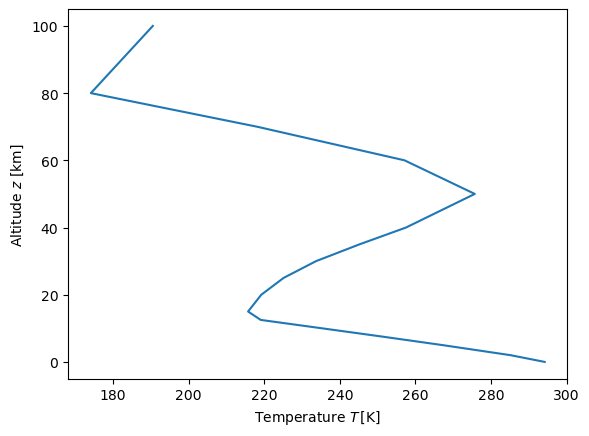

In [5]:
atmPlot(mls)

## ***Lines Spectra***

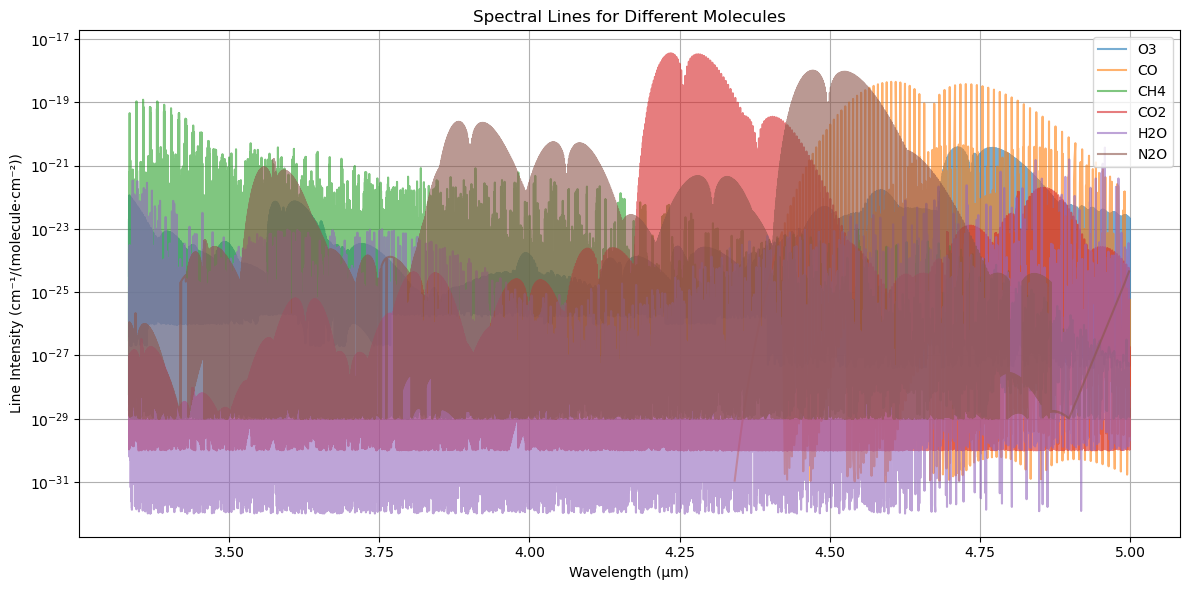

In [19]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot lines for each molecule
for molecule, lines in dll.items():
    # Extract wavenumber ('v') and intensity ('S') from lines
    wavenumbers = lines['v']  # frequency/wavenumber
    intensities = lines['S']  # line intensity
    # Convert wavenumber to wavelength (µm)
    wavelengths = 1e4/wavenumbers  # conversion from cm⁻¹ to µm
    # Sort data by wavelength (since 1/x inverts the order)
    idx = np.argsort(wavelengths)
    wavelengths = wavelengths[idx]
    intensities = intensities[idx]
    
    # Plot with lines connecting points
    plt.semilogy(wavelengths, intensities, '-', label=molecule, alpha=0.6)

plt.xlabel('Wavelength (µm)')
plt.ylabel('Line Intensity (cm⁻¹/(molecule⋅cm⁻²))')
plt.title('Spectral Lines for Different Molecules')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

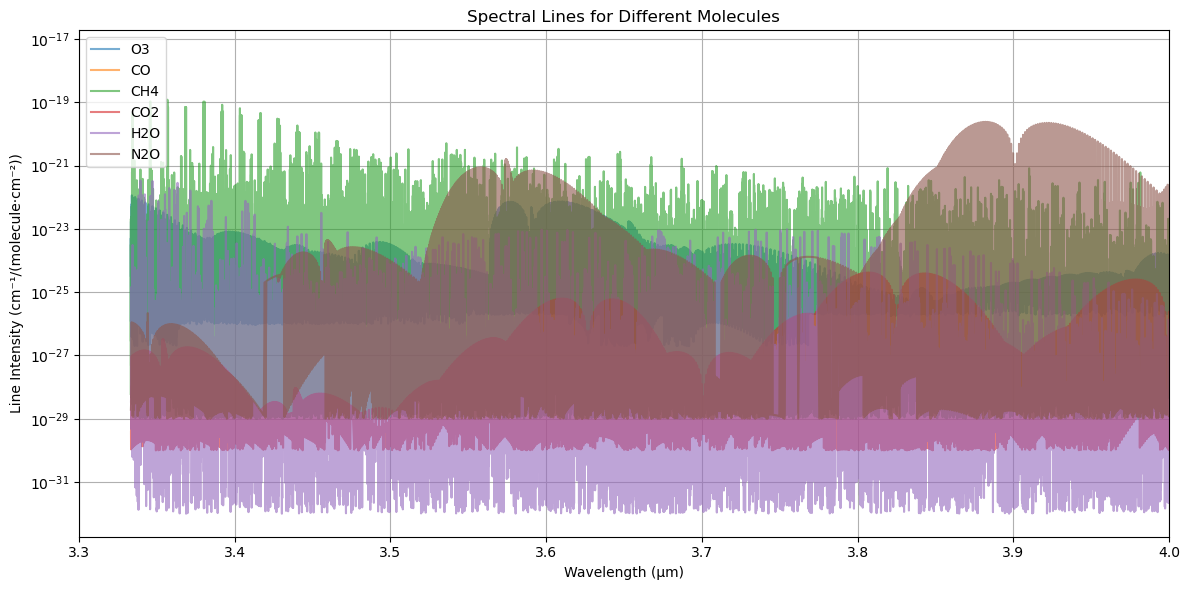

In [20]:
import numpy as np

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot lines for each molecule
for molecule, lines in dll.items():
    # Extract wavenumber ('v') and intensity ('S') from lines
    wavenumbers = lines['v']  # frequency/wavenumber
    intensities = lines['S']  # line intensity
    # Convert wavenumber to wavelength (µm)
    wavelengths = 1e4/wavenumbers  # conversion from cm⁻¹ to µm
    # Sort data by wavelength (since 1/x inverts the order)
    idx = np.argsort(wavelengths)
    wavelengths = wavelengths[idx]
    intensities = intensities[idx]
    
    # Plot with lines connecting points
    plt.semilogy(wavelengths, intensities, '-', label=molecule, alpha=0.6)

plt.xlabel('Wavelength (µm)')
plt.ylabel('Line Intensity (cm⁻¹/(molecule⋅cm⁻²))')
plt.title('Spectral Lines for Different Molecules')
plt.legend()
plt.grid(True)
# Set a narrower wavelength range (focusing on 3.3 to 4.0 µm)
plt.xlim(3.3, 4.0)
plt.tight_layout()
plt.show()

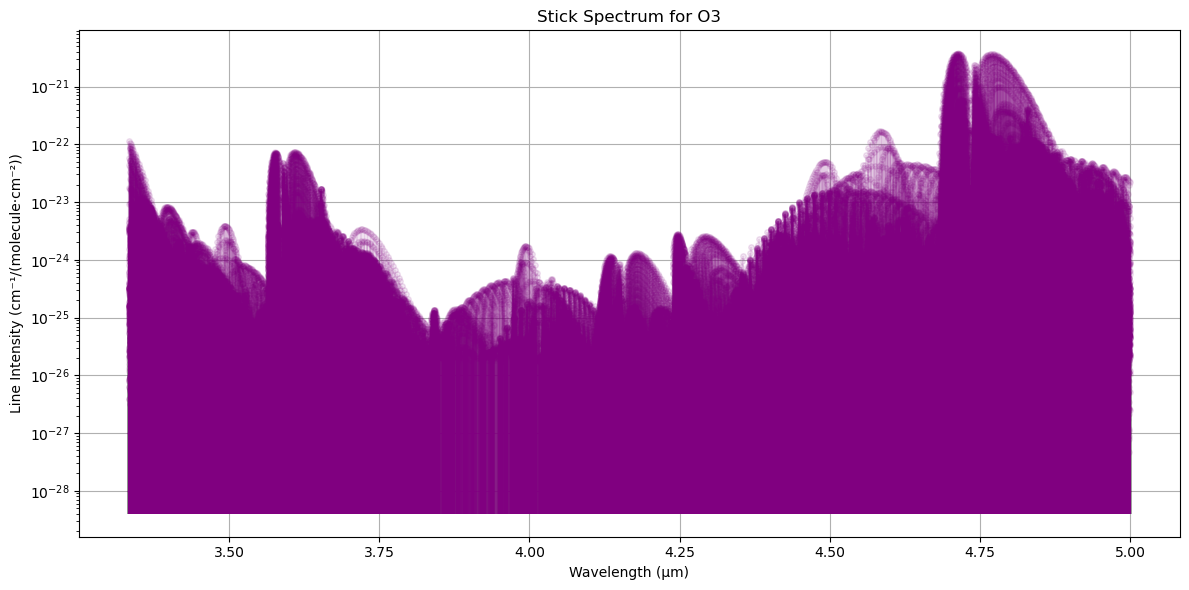

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Extrae datos de O3
molecule = 'O3'
lines = dll[molecule]
wavenumbers = lines['v']    # números de onda [cm⁻¹]
intensities  = lines['S']   # intensidades de línea

# Convierte a longitud de onda [µm]
wavelengths = 1e4 / wavenumbers

# Ordena
idx = np.argsort(wavelengths)
wavelengths = wavelengths[idx]
intensities = intensities[idx]

# Línea base para los "palitos" (puede ser cero, o un poco por debajo del mínimo)
baseline = np.min(intensities) * 0.1

# Dibuja los "sticks"
fig, ax = plt.subplots(figsize=(12,6))
ax.vlines(wavelengths, ymin=baseline, ymax=intensities, color='purple',alpha=0.1)
ax.plot(wavelengths, intensities, 'o', color='purple', ms=4, alpha=0.1)

ax.set_yscale('log')
ax.set_xlabel('Wavelength (µm)')
ax.set_ylabel('Line Intensity (cm⁻¹/(molecule⋅cm⁻²))')
ax.set_title(f'Stick Spectrum for {molecule}')
ax.grid(True)
#ax.set_xlim(4.50, 4.51)   # equivalente a 3.3336–3.3337 µm
plt.tight_layout()
plt.show()


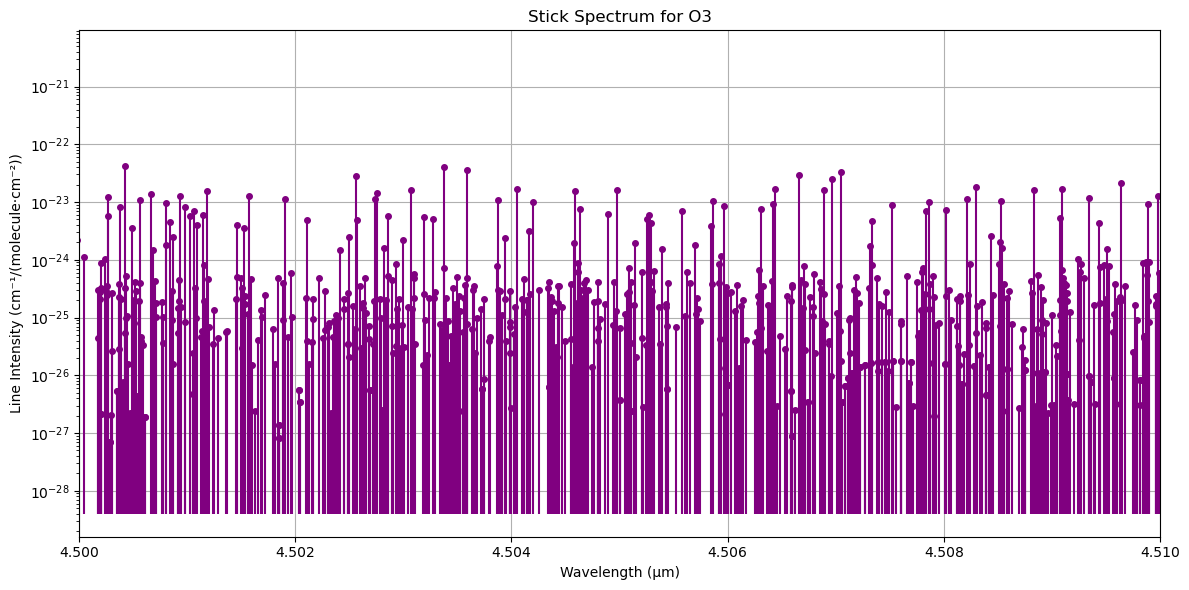

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extrae datos de O3
molecule = 'O3'
lines = dll[molecule]
wavenumbers = lines['v']    # números de onda [cm⁻¹]
intensities  = lines['S']   # intensidades de línea

# Convierte a longitud de onda [µm]
wavelengths = 1e4 / wavenumbers

# Ordena
idx = np.argsort(wavelengths)
wavelengths = wavelengths[idx]
intensities = intensities[idx]

# Línea base para los "palitos" (puede ser cero, o un poco por debajo del mínimo)
baseline = np.min(intensities) * 0.1

# Dibuja los "sticks"
fig, ax = plt.subplots(figsize=(12,6))
ax.vlines(wavelengths, ymin=baseline, ymax=intensities, color='purple')
ax.plot(wavelengths, intensities, 'o', color='purple', ms=4)

ax.set_yscale('log')
ax.set_xlabel('Wavelength (µm)')
ax.set_ylabel('Line Intensity (cm⁻¹/(molecule⋅cm⁻²))')
ax.set_title(f'Stick Spectrum for {molecule}')
ax.grid(True)
ax.set_xlim(4.50, 4.51)   # equivalente a 3.3336–3.3337 µm
plt.tight_layout()
plt.show()


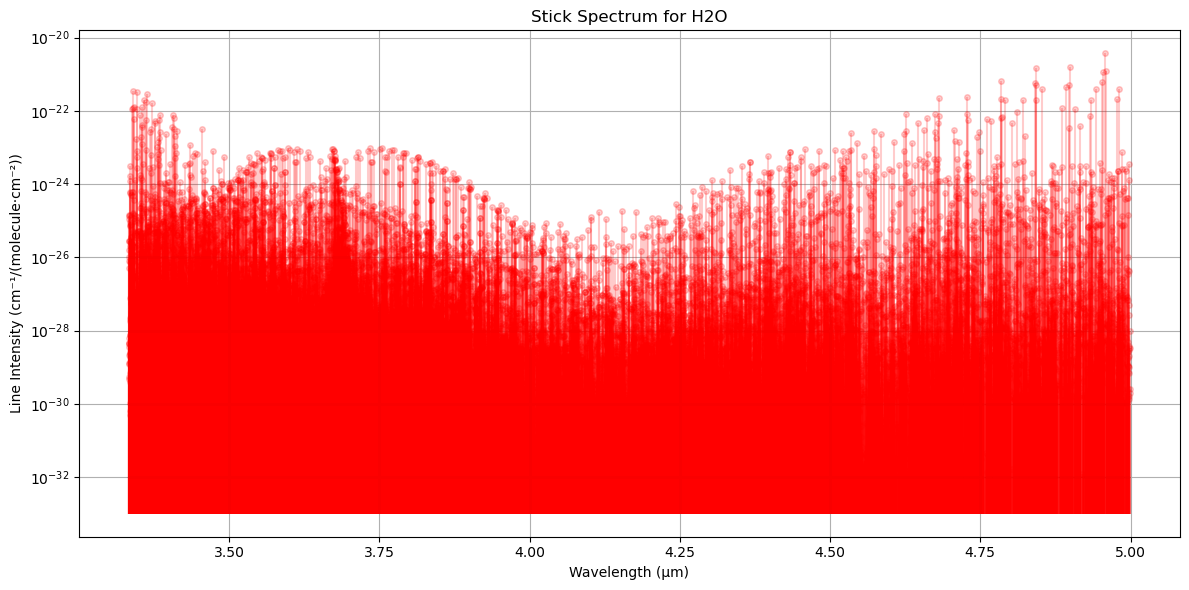

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Extrae datos de O3
molecule = 'H2O'
lines = dll[molecule]
wavenumbers = lines['v']    # números de onda [cm⁻¹]
intensities  = lines['S']   # intensidades de línea

# Convierte a longitud de onda [µm]
wavelengths = 1e4 / wavenumbers

# Ordena
idx = np.argsort(wavelengths)
wavelengths = wavelengths[idx]
intensities = intensities[idx]

# Línea base para los "palitos" (puede ser cero, o un poco por debajo del mínimo)
baseline = np.min(intensities) * 0.1

# Dibuja los "sticks"
fig, ax = plt.subplots(figsize=(12,6))
ax.vlines(wavelengths, ymin=baseline, ymax=intensities, color='red', alpha=0.2)
# Si quieres solo los palitos y no puntos, omites plot(...)
# Si quieres además los marcadores arriba:
ax.plot(wavelengths, intensities, 'o', color='red', ms=4, alpha=0.2)

ax.set_yscale('log')
ax.set_xlabel('Wavelength (µm)')
ax.set_ylabel('Line Intensity (cm⁻¹/(molecule⋅cm⁻²))')
ax.set_title(f'Stick Spectrum for {molecule}')
ax.grid(True)
#ax.set_xlim(4.50, 4.51)   # equivalente a 3.3336–3.3337 µm
plt.tight_layout()
plt.show()


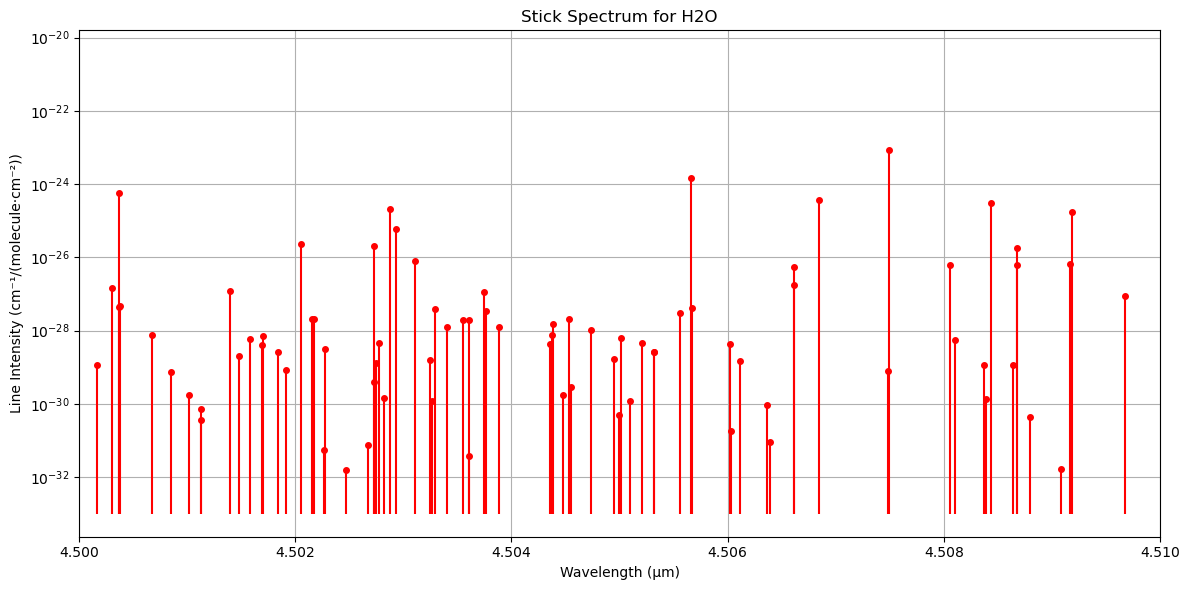

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Extrae datos de O3
molecule = 'H2O'
lines = dll[molecule]
wavenumbers = lines['v']    # números de onda [cm⁻¹]
intensities  = lines['S']   # intensidades de línea

# Convierte a longitud de onda [µm]
wavelengths = 1e4 / wavenumbers

# Ordena
idx = np.argsort(wavelengths)
wavelengths = wavelengths[idx]
intensities = intensities[idx]

# Línea base para los "palitos" (puede ser cero, o un poco por debajo del mínimo)
baseline = np.min(intensities) * 0.1

# Dibuja los "sticks"
fig, ax = plt.subplots(figsize=(12,6))
ax.vlines(wavelengths, ymin=baseline, ymax=intensities, color='red')
# Si quieres solo los palitos y no puntos, omites plot(...)
# Si quieres además los marcadores arriba:
ax.plot(wavelengths, intensities, 'o', color='red', ms=4)

ax.set_yscale('log')
ax.set_xlabel('Wavelength (µm)')
ax.set_ylabel('Line Intensity (cm⁻¹/(molecule⋅cm⁻²))')
ax.set_title(f'Stick Spectrum for {molecule}')
ax.grid(True)
ax.set_xlim(4.50, 4.51)   # equivalente a 3.3336–3.3337 µm
plt.tight_layout()
plt.show()


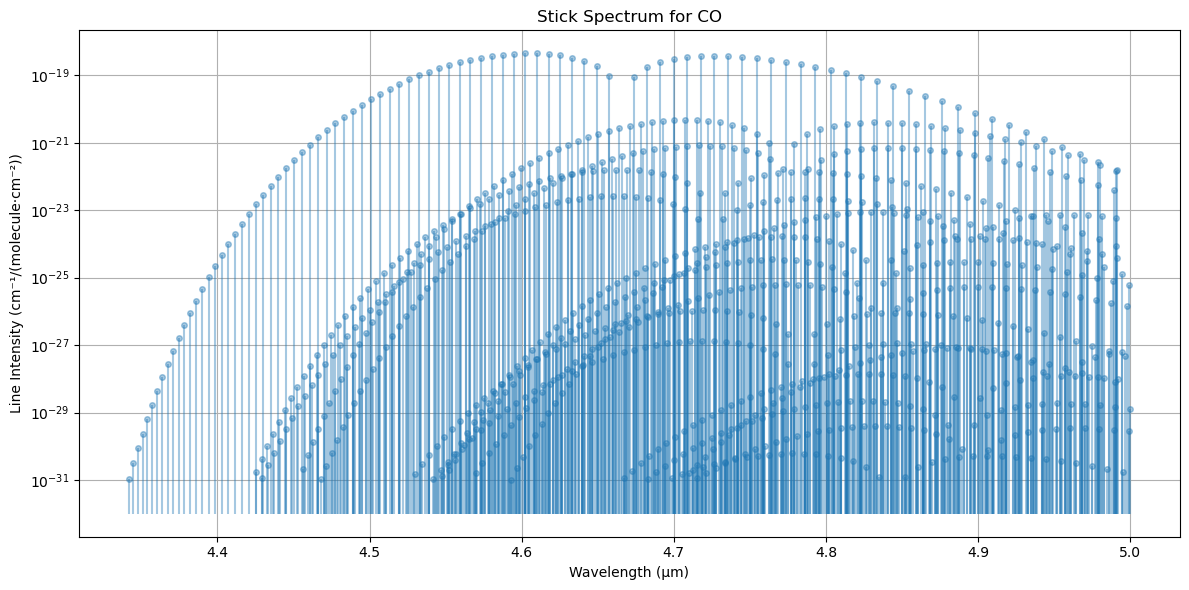

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Extrae datos de O3
molecule = 'CO'
lines = dll[molecule]
wavenumbers = lines['v']    # números de onda [cm⁻¹]
intensities  = lines['S']   # intensidades de línea

# Convierte a longitud de onda [µm]
wavelengths = 1e4 / wavenumbers

# Ordena
idx = np.argsort(wavelengths)
wavelengths = wavelengths[idx]
intensities = intensities[idx]

# Línea base para los "palitos" (puede ser cero, o un poco por debajo del mínimo)
baseline = np.min(intensities) * 0.1

# Dibuja los "sticks"
fig, ax = plt.subplots(figsize=(12,6))
ax.vlines(wavelengths, ymin=baseline, ymax=intensities, color='C0', alpha=0.4)
ax.plot(wavelengths, intensities, 'o', color='C0', ms=4, alpha=0.4)

ax.set_yscale('log')
ax.set_xlabel('Wavelength (µm)')
ax.set_ylabel('Line Intensity (cm⁻¹/(molecule⋅cm⁻²))')
ax.set_title(f'Stick Spectrum for {molecule}')
ax.grid(True)
plt.tight_layout()
plt.show()


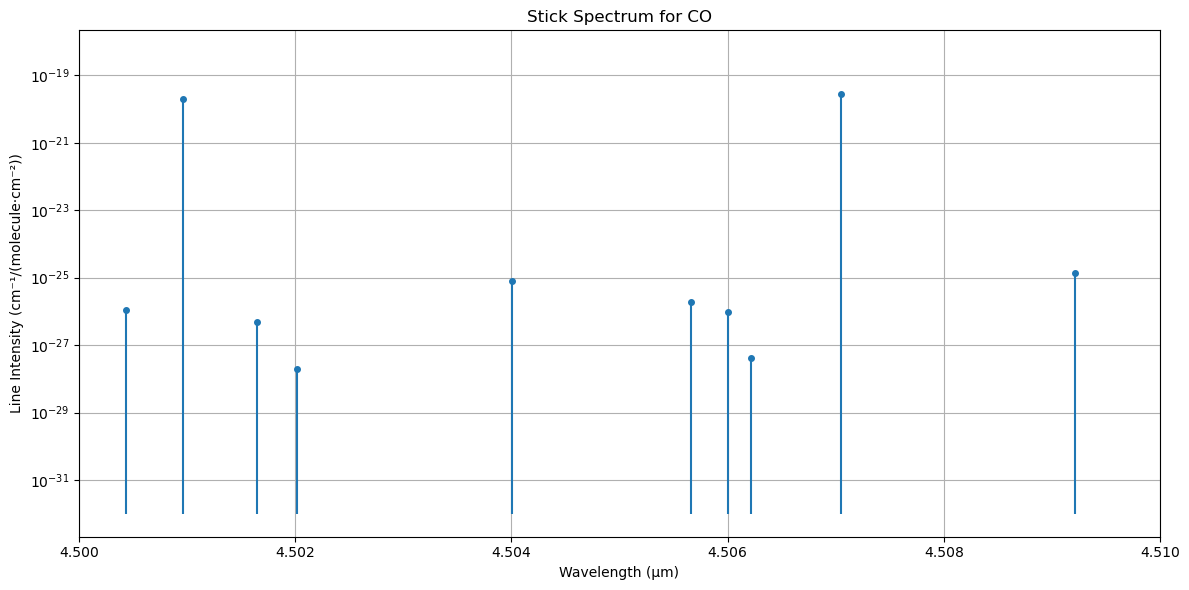

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Extrae datos de O3
molecule = 'CO'
lines = dll[molecule]
wavenumbers = lines['v']    # números de onda [cm⁻¹]
intensities  = lines['S']   # intensidades de línea

# Convierte a longitud de onda [µm]
wavelengths = 1e4 / wavenumbers

# Ordena
idx = np.argsort(wavelengths)
wavelengths = wavelengths[idx]
intensities = intensities[idx]

# Línea base para los "palitos" (puede ser cero, o un poco por debajo del mínimo)
baseline = np.min(intensities) * 0.1

# Dibuja los "sticks"
fig, ax = plt.subplots(figsize=(12,6))
ax.vlines(wavelengths, ymin=baseline, ymax=intensities, color='C0')
# Si quieres solo los palitos y no puntos, omites plot(...)
# Si quieres además los marcadores arriba:
ax.plot(wavelengths, intensities, 'o', color='C0', ms=4)

ax.set_yscale('log')
ax.set_xlabel('Wavelength (µm)')
ax.set_ylabel('Line Intensity (cm⁻¹/(molecule⋅cm⁻²))')
ax.set_title(f'Stick Spectrum for {molecule}')
ax.grid(True)
ax.set_xlim(4.50, 4.51)   # equivalente a 3.3336–3.3337 µm
plt.tight_layout()
plt.show()


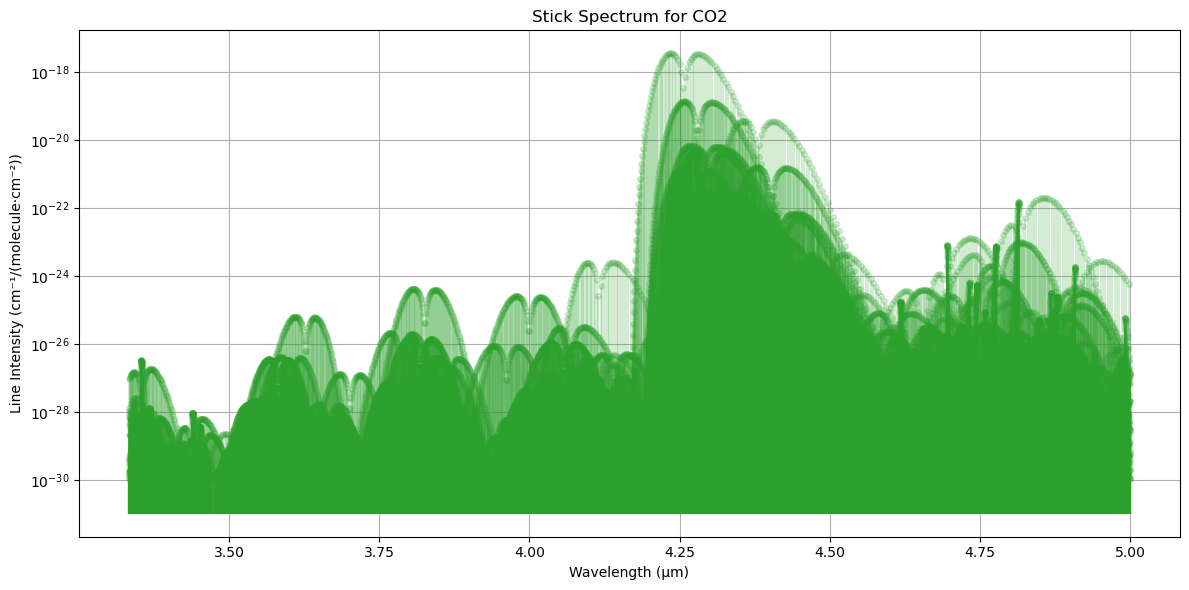

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Extrae datos de O3
molecule = 'CO2'
lines = dll[molecule]
wavenumbers = lines['v']    # números de onda [cm⁻¹]
intensities  = lines['S']   # intensidades de línea

# Convierte a longitud de onda [µm]
wavelengths = 1e4 / wavenumbers

# Ordena
idx = np.argsort(wavelengths)
wavelengths = wavelengths[idx]
intensities = intensities[idx]

# Línea base para los "palitos" (puede ser cero, o un poco por debajo del mínimo)
baseline = np.min(intensities) * 0.1

# Dibuja los "sticks"
fig, ax = plt.subplots(figsize=(12,6))
ax.vlines(wavelengths, ymin=baseline, ymax=intensities, color='C02', alpha=0.2)
ax.plot(wavelengths, intensities, 'o', color='C02', ms=4, alpha=0.2)

ax.set_yscale('log')
ax.set_xlabel('Wavelength (µm)')
ax.set_ylabel('Line Intensity (cm⁻¹/(molecule⋅cm⁻²))')
ax.set_title(f'Stick Spectrum for {molecule}')
ax.grid(True)
plt.tight_layout()
plt.show()


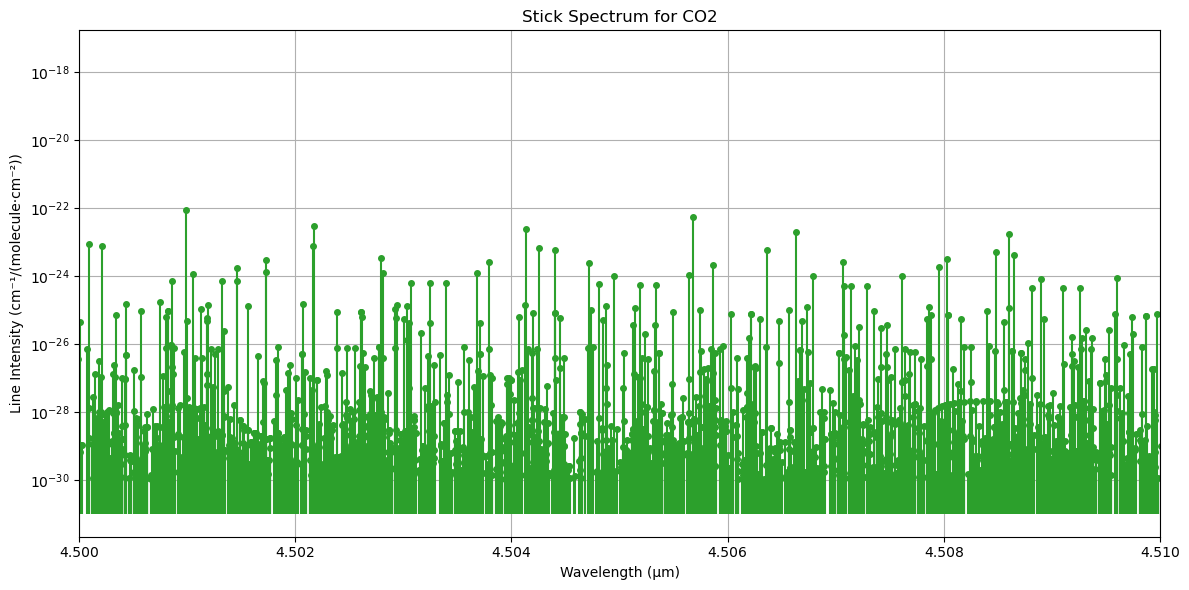

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Extrae datos de O3
molecule = 'CO2'
lines = dll[molecule]
wavenumbers = lines['v']    # números de onda [cm⁻¹]
intensities  = lines['S']   # intensidades de línea

# Convierte a longitud de onda [µm]
wavelengths = 1e4 / wavenumbers

# Ordena
idx = np.argsort(wavelengths)
wavelengths = wavelengths[idx]
intensities = intensities[idx]

# Línea base para los "palitos" (puede ser cero, o un poco por debajo del mínimo)
baseline = np.min(intensities) * 0.1

# Dibuja los "sticks"
fig, ax = plt.subplots(figsize=(12,6))
ax.vlines(wavelengths, ymin=baseline, ymax=intensities, color='C02')
# Si quieres solo los palitos y no puntos, omites plot(...)
# Si quieres además los marcadores arriba:
ax.plot(wavelengths, intensities, 'o', color='C02', ms=4)

ax.set_yscale('log')
ax.set_xlabel('Wavelength (µm)')
ax.set_ylabel('Line Intensity (cm⁻¹/(molecule⋅cm⁻²))')
ax.set_title(f'Stick Spectrum for {molecule}')
ax.grid(True)
ax.set_xlim(4.50, 4.51)   # equivalente a 3.3336–3.3337 µm
plt.tight_layout()
plt.show()


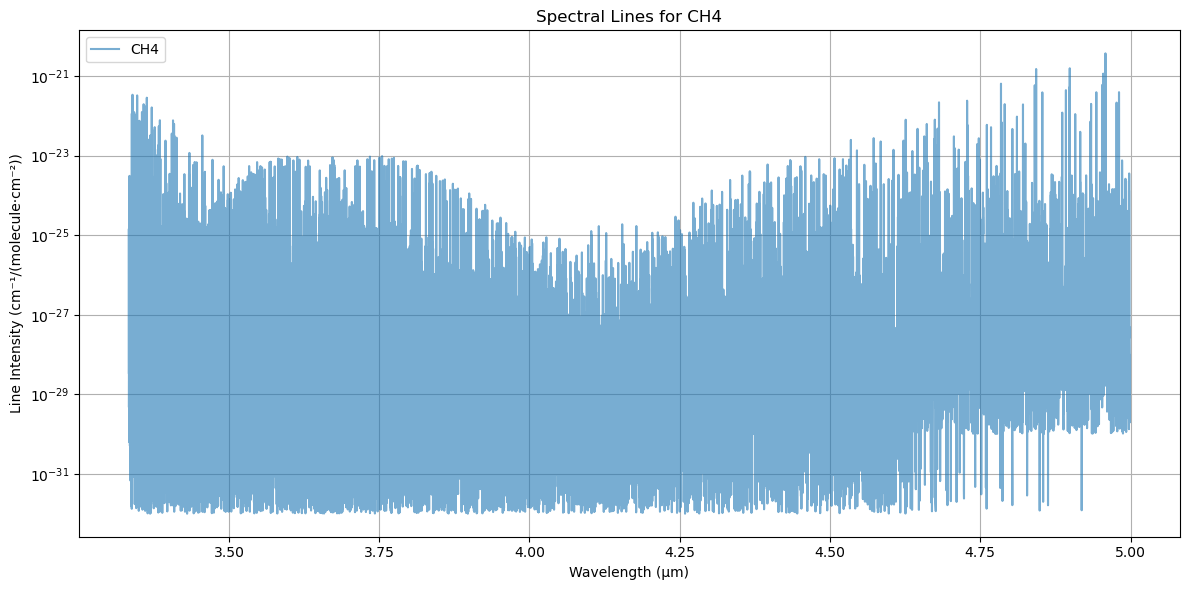

In [28]:
import numpy as np

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Extract data for O3 only
molecule = 'CH4'
lines = dll[molecule]

# Plot with lines connecting points
plt.semilogy(wavelengths, intensities, '-', label=molecule, alpha=0.6)

plt.xlabel('Wavelength (µm)')
plt.ylabel('Line Intensity (cm⁻¹/(molecule⋅cm⁻²))')
plt.title('Spectral Lines for CH4')
plt.legend()
plt.grid(True)
#plt.xlim(3.3, 4.0)
plt.tight_layout()
plt.show()

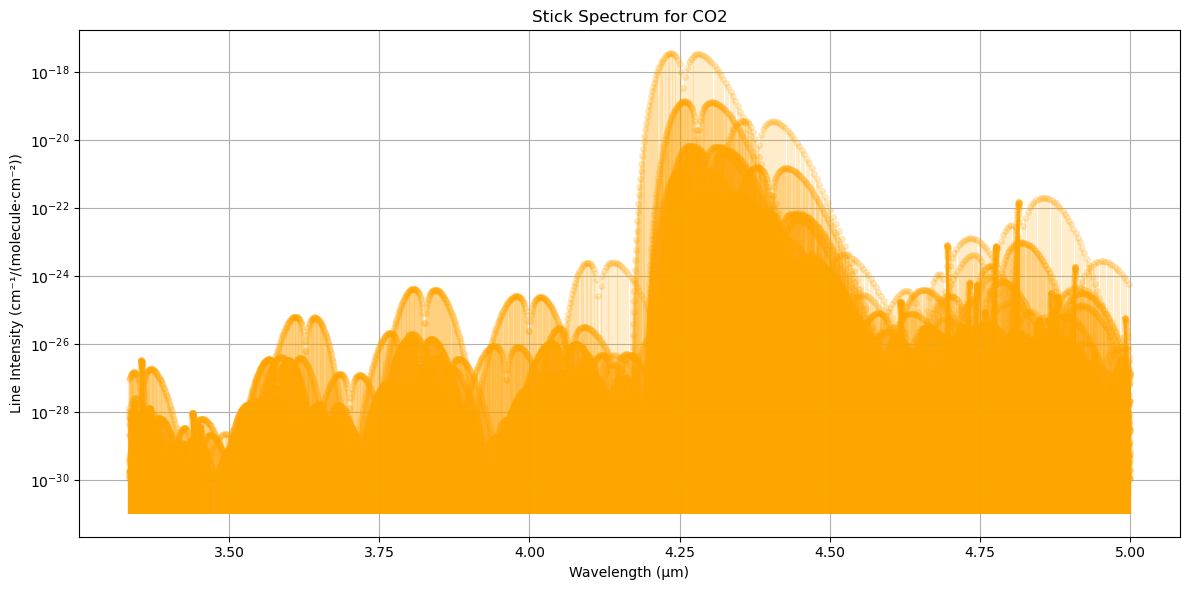

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Extrae datos de O3
molecule = 'CO2'
lines = dll[molecule]
wavenumbers = lines['v']    # números de onda [cm⁻¹]
intensities  = lines['S']   # intensidades de línea

# Convierte a longitud de onda [µm]
wavelengths = 1e4 / wavenumbers

# Ordena
idx = np.argsort(wavelengths)
wavelengths = wavelengths[idx]
intensities = intensities[idx]

# Línea base para los "palitos" (puede ser cero, o un poco por debajo del mínimo)
baseline = np.min(intensities) * 0.1

# Dibuja los "sticks"
fig, ax = plt.subplots(figsize=(12,6))
ax.vlines(wavelengths, ymin=baseline, ymax=intensities, color='orange', alpha=0.2)
# Si quieres solo los palitos y no puntos, omites plot(...)
# Si quieres además los marcadores arriba:
ax.plot(wavelengths, intensities, 'o', color='orange', ms=4, alpha=0.2)

ax.set_yscale('log')
ax.set_xlabel('Wavelength (µm)')
ax.set_ylabel('Line Intensity (cm⁻¹/(molecule⋅cm⁻²))')
ax.set_title(f'Stick Spectrum for {molecule}')
ax.grid(True)
#ax.set_xlim(4.50, 4.51)   # equivalente a 3.3336–3.3337 µm
plt.tight_layout()
plt.show()


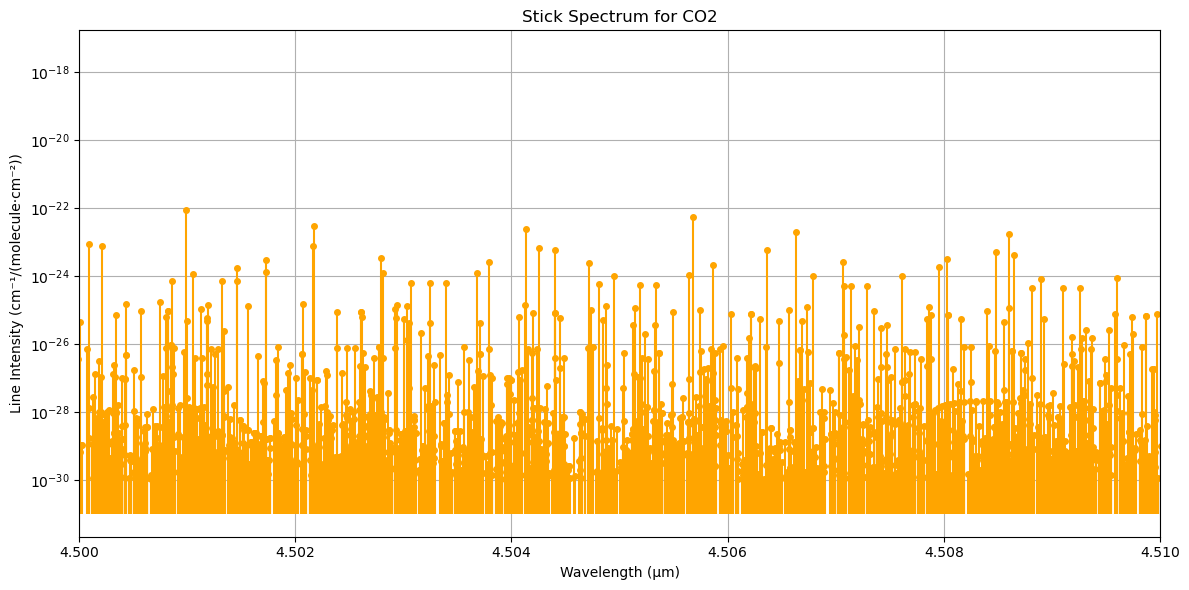

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Extrae datos de O3
molecule = 'CO2'
lines = dll[molecule]
wavenumbers = lines['v']    # números de onda [cm⁻¹]
intensities  = lines['S']   # intensidades de línea

# Convierte a longitud de onda [µm]
wavelengths = 1e4 / wavenumbers

# Ordena
idx = np.argsort(wavelengths)
wavelengths = wavelengths[idx]
intensities = intensities[idx]

# Línea base para los "palitos" (puede ser cero, o un poco por debajo del mínimo)
baseline = np.min(intensities) * 0.1

# Dibuja los "sticks"
fig, ax = plt.subplots(figsize=(12,6))
ax.vlines(wavelengths, ymin=baseline, ymax=intensities, color='orange')
# Si quieres solo los palitos y no puntos, omites plot(...)
# Si quieres además los marcadores arriba:
ax.plot(wavelengths, intensities, 'o', color='orange', ms=4)

ax.set_yscale('log')
ax.set_xlabel('Wavelength (µm)')
ax.set_ylabel('Line Intensity (cm⁻¹/(molecule⋅cm⁻²))')
ax.set_title(f'Stick Spectrum for {molecule}')
ax.grid(True)
ax.set_xlim(4.50, 4.51)   # equivalente a 3.3336–3.3337 µm
plt.tight_layout()
plt.show()


## ***Cross Section***

### ***Wavenumber***

 lbl2xs:  O3        48.00amu  pressure [g/cm/s**2] 1.01325e+06 ---> 1013.25
                              temperature      [K]      296.0  ---> 296.0
 mean p-induced line shift  -0.000001 for p/pRef 0.001

 voigt line parameters at       1.01mb and    296.00K
 position         2000.001500 <=  v <=  2999.999692
 strength               4e-28 <=  S <=     3.75e-21
 Lorentz width              0 <=  L <=     9.26e-05
 Gauss width          0.00178 <=  D <=      0.00267
 cross section  O3       120872 lines   1.01325mb  296.0K  12.5 lbl_2grids_chi Interval [2100,3000] 10.0 8 25.0 True 12.5

 lbl_2grids_chi:    vGrid 4024425 0.00022363448781738702   w 503054 0.0017890759025390962
 v:    4024424  2100.000000 2100.000224 2100.000447 2100.000671 2100.000895  ...  2999.999105 2999.999329 2999.999553 2999.999776 3000.000000
 w:     503053  2100.000000 2100.001789 2100.003578 2100.005367 2100.007156  ...  2999.992844 2999.994633 2999.996422 2999.998211 3000.000000
    4024425    88.47sec     0.18ns:

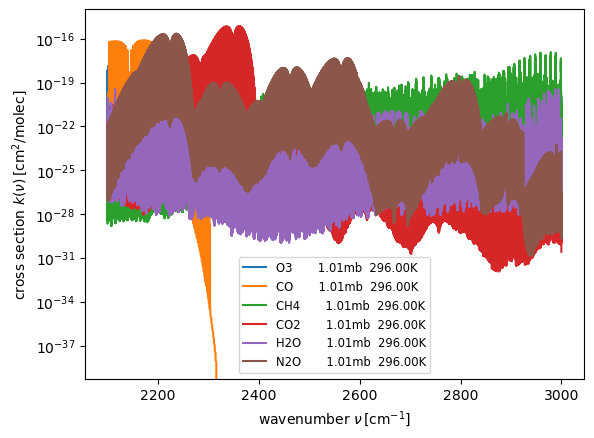

In [14]:
vLimits = (2100.0, 3000.0)

# Asegúrate de que las variables line_data (o dll), lineShape, sampling, nGrids, gridRatio, nWidths, lagrange y verbose estén definidas
xs = lbl2xs(
    dll,  # o line_data, según lo que estés usando
    pressure=pressure_fixed,
    temperature=temperature_fixed,
    xLimits=vLimits,
    lineShape=line_shape,
    sampling=sampling,
    nGrids=n_grids,
    gridRatio=grid_ratio,
    nWidths=n_widths,
    lagrange=lagrange,
    verbose=verbose,
)

xsPlot(xs)

 lbl2xs:  O3        48.00amu  pressure [g/cm/s**2] 1.01325e+06 ---> 1013.25
                              temperature      [K]      296.0  ---> 296.0
 mean p-induced line shift  -0.000001 for p/pRef 0.001

 voigt line parameters at       1.01mb and    296.00K
 position         2000.001500 <=  v <=  2999.999692
 strength               4e-28 <=  S <=     3.75e-21
 Lorentz width              0 <=  L <=     9.26e-05
 Gauss width          0.00178 <=  D <=      0.00267
 cross section  O3       120872 lines   1.01325mb  296.0K  12.5 
 wavenumber grid:      9472+1 points:  2100.000000 2100.000211 2100.000422  ...  2101.999789 2102.000000   (delta  0.000211149) 64
       9473     2.04sec     1.79ns:  3.08485e-23 < xs < 1.39269e-18
 lbl2xs:  CO        28.01amu  pressure [g/cm/s**2] 1.01325e+06 ---> 1013.25
                              temperature      [K]      296.0  ---> 296.0
 mean p-induced line shift  -0.000003 for p/pRef 0.001

 voigt line parameters at       1.01mb and    296.00K
 positio

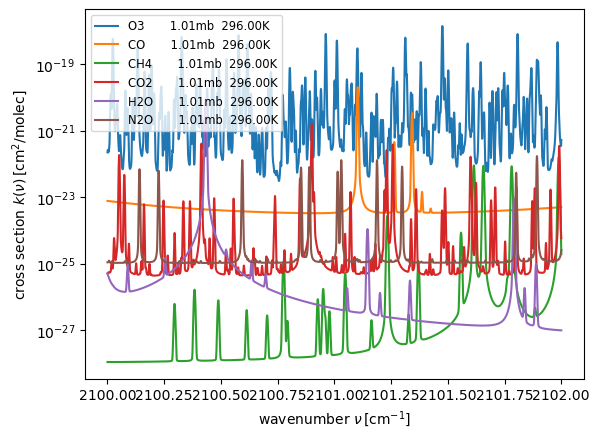

In [15]:
vLimits = (2100.0, 2102.0)

# Asegúrate de que las variables line_data (o dll), lineShape, sampling, nGrids, gridRatio, nWidths, lagrange y verbose estén definidas
xs = lbl2xs(
    dll,  # o line_data, según lo que estés usando
    pressure=pressure_fixed,
    temperature=temperature_fixed,
    xLimits=vLimits,
    lineShape=line_shape,
    sampling=sampling,
    nGrids=n_grids,
    gridRatio=grid_ratio,
    nWidths=n_widths,
    lagrange=lagrange,
    verbose=verbose,
)

xsPlot(xs)

### ***WaveLength***

 cross section  O3       120872 lines   1.01325mb  296.0K  12.5     4024425    67.14sec     0.14ns:  1.54812e-28 < xs < 1.71437e-18
 cross section  CO         960 lines   1.01325mb  296.0K  12.5     3539033     0.46sec     0.14ns:         0 < xs < 8.09729e-17
 cross section  CH4      71857 lines   1.01325mb  296.0K  12.5     2145849    39.90sec     0.26ns:  1.53269e-29 < xs < 1.22651e-17
 cross section  CO2      108544 lines   1.01325mb  296.0K  12.5     4124841    88.17sec     0.20ns:  1.14185e-32 < xs < 7.3512e-16
 cross section  H2O      22601 lines   1.01325mb  296.0K  25.0     2355257    22.48sec     0.42ns:  1.06212e-30 < xs < 4.40243e-20
 cross section  N2O      45891 lines   1.01325mb  296.0K  12.5     3926337    39.10sec     0.22ns:  1.36755e-31 < xs < 2.19292e-16


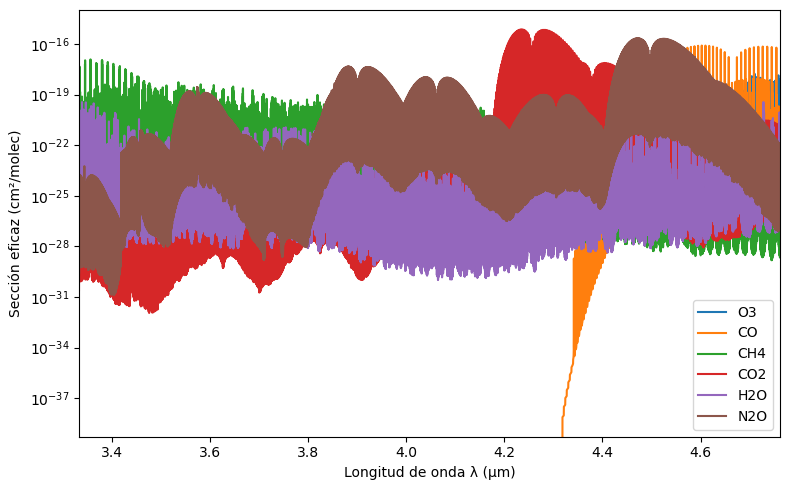

In [79]:
import numpy as np
import matplotlib.pyplot as plt

vLimits = (2100.0, 3000.0)
plt.figure(figsize=(8, 5))

for specie, line_data in dll.items():
    # line_data es cada objeto de líneas, igual que hacías antes con CH4
    xs = lbl2xs(
        line_data,
        pressure=pressure_fixed,
        temperature=temperature_fixed,
        xLimits=vLimits,
        lineShape=line_shape,
        sampling=sampling,
        nGrids=n_grids,
        gridRatio=grid_ratio,
        nWidths=n_widths,
        lagrange=lagrange,
        verbose=False,
    )
    nu   = xs.grid()            # wavenumber [cm⁻¹]
    I    = xs[:]                # sección eficaz [cm²/mol]
    lam  = 1e4/nu               # convierte a λ en µm
    idx  = np.argsort(lam)
    lam_s = lam[idx]
    I_s   = I[idx]
    plt.plot(lam_s, I_s, label=specie)

plt.xlim(1e4/vLimits[1], 1e4/vLimits[0])
plt.yscale('log')
plt.xlabel("Longitud de onda λ (µm)")
plt.ylabel("Sección eficaz (cm²/molec)")
plt.legend()
plt.tight_layout()
plt.show()


 cross section  O3       120872 lines   1.01325mb  296.0K  12.5       23681     2.67sec     0.93ns:  2.83397e-23 < xs < 1.39269e-18
 cross section  CO         960 lines   1.01325mb  296.0K  12.5       20033     0.02sec     1.03ns:  3.31625e-24 < xs < 6.10223e-17
 cross section  CH4      71857 lines   1.01325mb  296.0K  12.5       11905     1.07sec     1.25ns:  1.12012e-28 < xs < 1.59303e-22
 cross section  CO2      108544 lines   1.01325mb  296.0K  12.5       23169     2.44sec     0.97ns:  4.39374e-26 < xs < 2.07685e-21
 cross section  H2O      22601 lines   1.01325mb  296.0K  25.0       13185     0.35sec     1.17ns:  7.45846e-28 < xs < 8.97114e-21
 cross section  N2O      45891 lines   1.01325mb  296.0K  12.5       21825     0.92sec     0.91ns:  1.06061e-25 < xs < 2.96105e-22


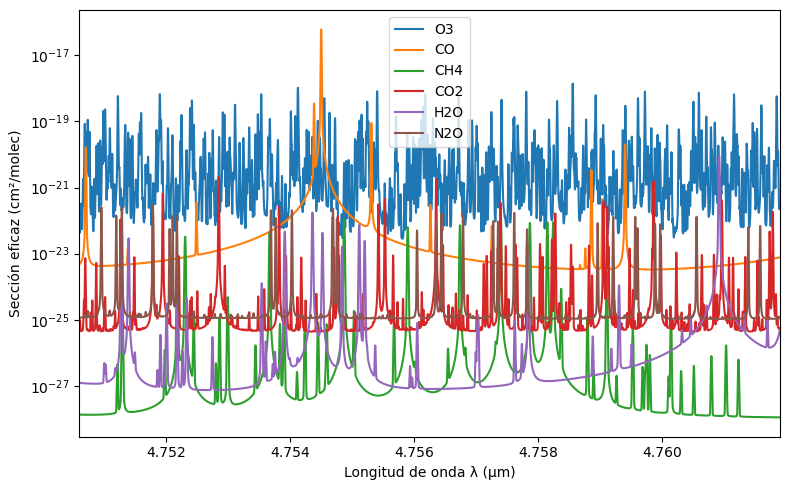

In [17]:
import numpy as np
import matplotlib.pyplot as plt

vLimits = (2100.0, 2105.0)
plt.figure(figsize=(8, 5))

for specie, line_data in dll.items():
    # line_data es cada objeto de líneas, igual que hacías antes con CH4
    xs = lbl2xs(
        line_data,
        pressure=pressure_fixed,
        temperature=temperature_fixed,
        xLimits=vLimits,
        lineShape=line_shape,
        sampling=sampling,
        nGrids=n_grids,
        gridRatio=grid_ratio,
        nWidths=n_widths,
        lagrange=lagrange,
        verbose=False,
    )
    nu   = xs.grid()            # wavenumber [cm⁻¹]
    I    = xs[:]                # sección eficaz [cm²/mol]
    lam  = 1e4/nu               # convierte a λ en µm
    idx  = np.argsort(lam)
    lam_s = lam[idx]
    I_s   = I[idx]
    plt.plot(lam_s, I_s, label=specie)

plt.xlim(1e4/vLimits[1], 1e4/vLimits[0])
plt.yscale('log')
plt.xlabel("Longitud de onda λ (µm)")
plt.ylabel("Sección eficaz (cm²/molec)")
plt.legend()
plt.tight_layout()
plt.show()


 lbl2xs:  CH4       16.04amu  pressure [g/cm/s**2] 1.01325e+06 ---> 1013.25
                              temperature      [K]      296.0  ---> 296.0
 mean p-induced line shift  -0.000005 for p/pRef 0.001

 voigt line parameters at       1.01mb and    296.00K
 position         2000.055400 <=  v <=  2999.998052
 strength               1e-29 <=  S <=     1.21e-19
 Lorentz width        1.9e-06 <=  L <=     8.15e-05
 Gauss width          0.00308 <=  D <=      0.00461
 cross section  CH4      71857 lines   1.01325mb  296.0K  12.5 lbl_2grids_chi Interval [2100,3000] 10.0 8 25.0 True 12.5

 lbl_2grids_chi:    vGrid 2145849 0.00041941460904966244   w 268232 0.0033553168723972995
 v:    2145848  2100.000000 2100.000419 2100.000839 2100.001258 2100.001678  ...  2999.998322 2999.998742 2999.999161 2999.999581 3000.000000
 w:     268231  2100.000000 2100.003355 2100.006711 2100.010066 2100.013421  ...  2999.986579 2999.989934 2999.993289 2999.996645 3000.000000
    2145849    41.45sec     0.27ns: 

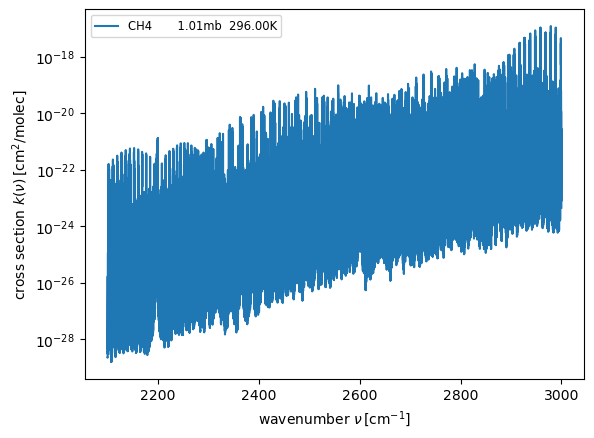

In [18]:
vLimits = (2100.0, 3000.0)

# Asegúrate de que las variables line_data (o dll), lineShape, sampling, nGrids, gridRatio, nWidths, lagrange y verbose estén definidas
xs = lbl2xs(
    dll['CH4'],  # o line_data, según lo que estés usando
    pressure=pressure_fixed,
    temperature=temperature_fixed,
    xLimits=vLimits,
    lineShape=line_shape,
    sampling=sampling,
    nGrids=n_grids,
    gridRatio=grid_ratio,
    nWidths=n_widths,
    lagrange=lagrange,
    verbose=verbose,
)

xsPlot(xs)

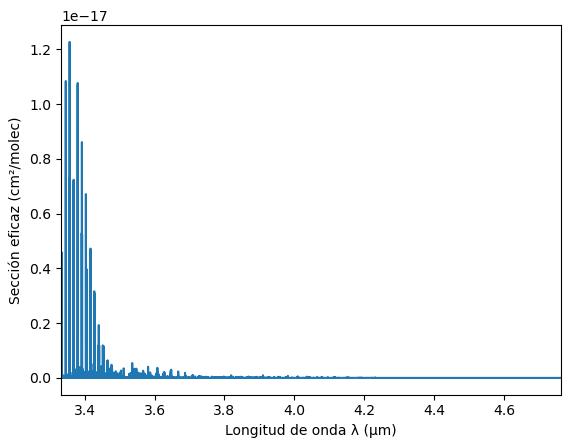

In [19]:
import numpy as np
import matplotlib.pyplot as plt

nu = xs.grid()       # ndarray de wavenumbers
I  = xs[:]           # ndarray de intensidades / secciones eficaces

lam = 1e4 / nu       # λ en µm

idx   = np.argsort(lam)
lam_s = lam[idx]
I_s   = I[idx]

plt.plot(lam_s, I_s)
plt.xlabel("Longitud de onda λ (µm)")
plt.ylabel("Sección eficaz (cm²/molec)")

# Para invertir el eje si quieres que crezca hacia la derecha
λ_min, λ_max = 1e4/vLimits[1], 1e4/vLimits[0]
plt.xlim(λ_min, λ_max)

plt.show()



 lbl2xs:  O3        48.00amu  pressure [g/cm/s**2] 1.01325e+06 ---> 1013.25
                              temperature      [K]      296.0  ---> 296.0
 mean p-induced line shift  -0.000001 for p/pRef 0.001

 voigt line parameters at       1.01mb and    296.00K
 position         2000.001500 <=  v <=  2999.999692
 strength               4e-28 <=  S <=     3.75e-21
 Lorentz width              0 <=  L <=     9.26e-05
 Gauss width          0.00178 <=  D <=      0.00267
 cross section  O3       120872 lines   1.01325mb  296.0K  12.5 lbl_2grids_chi Interval [2100,3000] 10.0 8 25.0 True 12.5

 lbl_2grids_chi:    vGrid 4024425 0.00022363448781738702   w 503054 0.0017890759025390962
 v:    4024424  2100.000000 2100.000224 2100.000447 2100.000671 2100.000895  ...  2999.999105 2999.999329 2999.999553 2999.999776 3000.000000
 w:     503053  2100.000000 2100.001789 2100.003578 2100.005367 2100.007156  ...  2999.992844 2999.994633 2999.996422 2999.998211 3000.000000
    4024425    75.05sec     0.15ns:

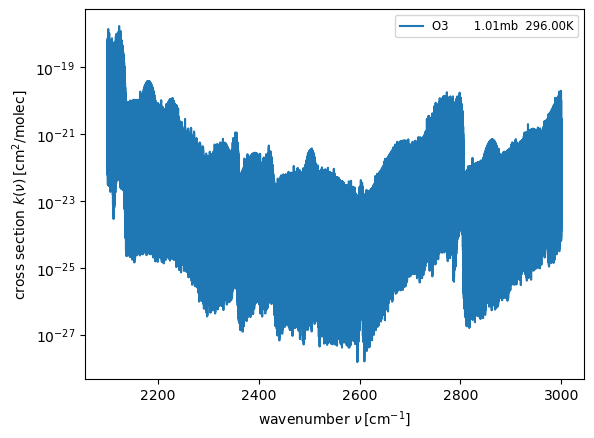

In [20]:

vLimits = (2100.0, 3000.0)
# Asegúrate de que las variables line_data (o dll), lineShape, sampling, nGrids, gridRatio, nWidths, lagrange y verbose estén definidas
xs = lbl2xs(
    dll['O3'],  # o line_data, según lo que estés usando
    pressure=pressure_fixed,
    temperature=temperature_fixed,
    xLimits=vLimits,
    lineShape=line_shape,
    sampling=sampling,
    nGrids=n_grids,
    gridRatio=grid_ratio,
    nWidths=n_widths,
    lagrange=lagrange,
    verbose=verbose,
)

xsPlot(xs)

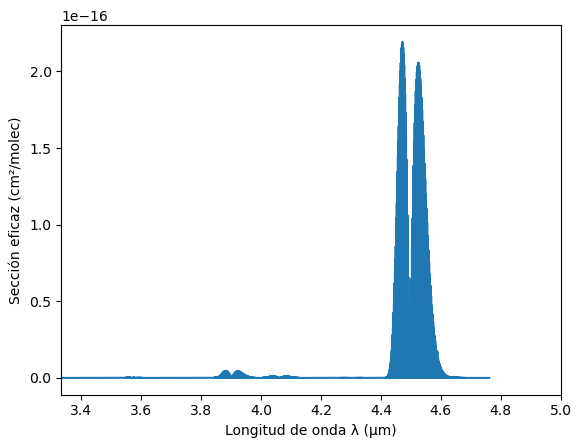

In [80]:
import numpy as np
import matplotlib.pyplot as plt

nu = xs.grid()       # ndarray de wavenumbers
I  = xs[:]           # ndarray de intensidades / secciones eficaces

lam = 1e4 / nu       # λ en µm

idx   = np.argsort(lam)
lam_s = lam[idx]
I_s   = I[idx]

plt.plot(lam_s, I_s)
plt.xlabel("Longitud de onda λ (µm)")
plt.ylabel("Sección eficaz (cm²/molec)")

# Para invertir el eje si quieres que crezca hacia la derecha
λ_min, λ_max = 1e4/vLimits[1], 1e4/vLimits[0]
plt.xlim(λ_min, 5.00)

plt.show()



## ***Optical Depth***

In [ ]:
from py4cats import lbl2od, odPlot
dodl = lbl2od(mls, dll)

 lbl2od:   20 levels atmosphere  H2O CO2 O3 N2O CO CH4 N2 O2 and 370725 lines of ['O3', 'CO', 'CH4', 'CO2', 'H2O', 'N2O']

 lbl2xs:  O3        48.00amu 120872 lines @ reference p [g/cm/s**2]  1.013e+06      T [K] 296.00  ---> 20 p,T pairs 
 cross section  O3       120872 lines      1013mb  294.2K  10.0         321     2.83sec    72.86ns:  1.40786e-20 < xs < 3.73331e-20
 cross section  O3       120872 lines       902mb  289.7K  10.0         321     2.54sec    65.56ns:  1.33714e-20 < xs < 4.00382e-20
 cross section  O3       120872 lines       802mb  285.2K  10.0         385     2.61sec    56.08ns:  1.26487e-20 < xs < 4.33809e-20
 cross section  O3       120872 lines       710mb  279.2K  10.0         449     2.79sec    51.43ns:  1.19305e-20 < xs < 4.74743e-20
 cross section  O3       120872 lines       628mb  273.2K  10.0         513     2.61sec    42.12ns:  1.12127e-20 < xs < 5.22416e-20
 cross section  O3       120872 lines       554mb  267.2K  10.0         577     2.77sec    39.72ns: 

 lbl2od:   20 levels atmosphere  H2O CO2 O3 N2O CO CH4 N2 O2 and 960 lines of ['CO']

 lbl2xs:  CO        28.01amu 960 lines @ reference p [g/cm/s**2]  1.013e+06      T [K] 296.00  ---> 20 p,T pairs 
 cross section  CO         960 lines      1013mb  294.2K  10.0       27873     0.12sec     4.60ns:  1.8055e-32 < xs < 2.32329e-18
 cross section  CO         960 lines       902mb  289.7K  10.0       30945     0.09sec     3.15ns:  1.06195e-32 < xs < 2.61436e-18
 cross section  CO         960 lines       802mb  285.2K  10.0       34401     0.11sec     3.35ns:  6.15942e-33 < xs < 2.92824e-18
 cross section  CO         960 lines       710mb  279.2K  10.0       38249     0.12sec     3.20ns:  3.02747e-33 < xs < 3.26267e-18
 cross section  CO         960 lines       628mb  273.2K  10.0       42545     0.14sec     3.32ns:  1.4512e-33 < xs < 3.68172e-18
 cross section  CO         960 lines       554mb  267.2K  10.0       47425     0.14sec     3.04ns:  6.7641e-34 < xs < 4.13695e-18
 cross section  C

/home/julianleon/.conda/envs/py4cats_fix/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/julianleon/.conda/envs/py4cats_fix/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


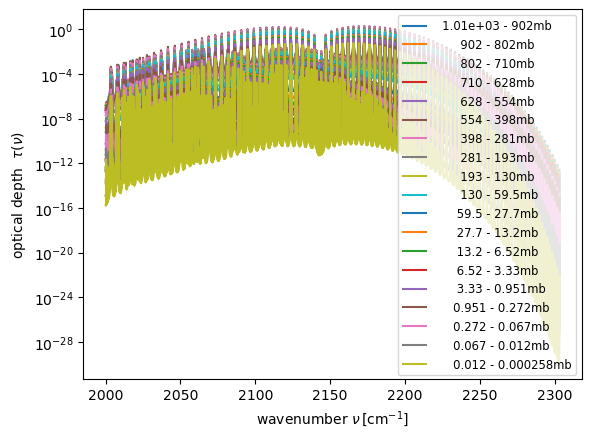

In [82]:
from py4cats import lbl2od, odPlot
dodl = lbl2od(mls, dll['CO'])
odPlot(dodl)

 lbl2od:   20 levels atmosphere  H2O CO2 O3 N2O CO CH4 N2 O2 and 960 lines of ['CO']

 lbl2xs:  CO        28.01amu 960 lines @ reference p [g/cm/s**2]  1.013e+06      T [K] 296.00  ---> 20 p,T pairs 
 cross section  CO         960 lines      1013mb  294.2K  10.0        4425     0.05sec    10.78ns:  6.03653e-22 < xs < 1.9509e-18
 cross section  CO         960 lines       902mb  289.7K  10.0        4913     0.03sec     6.73ns:  5.4846e-22 < xs < 2.17907e-18
 cross section  CO         960 lines       802mb  285.2K  10.0        5465     0.03sec     4.98ns:  4.97917e-22 < xs < 2.4286e-18
 cross section  CO         960 lines       710mb  279.2K  10.0        6081     0.03sec     5.15ns:  4.53436e-22 < xs < 2.73377e-18
 cross section  CO         960 lines       628mb  273.2K  10.0        6761     0.03sec     4.92ns:  4.13065e-22 < xs < 3.06546e-18
 cross section  CO         960 lines       554mb  267.2K  10.0        7537     0.03sec     4.59ns:  3.75752e-22 < xs < 3.44456e-18
 cross section  C

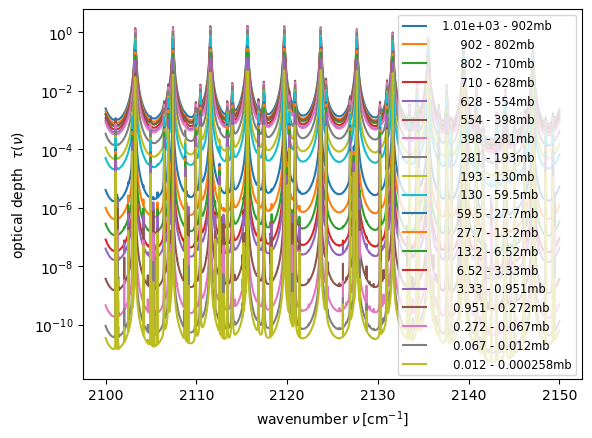

In [ ]:
vLimits = (2100.0, 2150.0)
dodl = lbl2od(mls, dll['CO'], vLimits)
odPlot(dodl)


### ***Optical Depth in λ***

 lbl2od:   20 levels atmosphere  H2O CO2 O3 N2O CO CH4 N2 O2 and 120872 lines of ['O3']

 lbl2xs:  O3        48.00amu 120872 lines @ reference p [g/cm/s**2]  1.013e+06      T [K] 296.00  ---> 20 p,T pairs 
 cross section  O3       120872 lines      1013mb  294.2K  10.0       69097     9.48sec     1.13ns:  1.39235e-25 < xs < 7.85736e-20
 cross section  O3       120872 lines       902mb  289.7K  10.0       76673     9.96sec     1.08ns:  1.2155e-25 < xs < 8.4203e-20
 cross section  O3       120872 lines       802mb  285.2K  10.0       85177    13.06sec     1.27ns:  1.05539e-25 < xs < 8.99425e-20
 cross section  O3       120872 lines       710mb  279.2K  10.0       94625     9.23sec     0.81ns:  8.87398e-26 < xs < 9.64766e-20
 cross section  O3       120872 lines       628mb  273.2K  10.0      105177     9.77sec     0.77ns:  7.27527e-26 < xs < 1.02986e-19
 cross section  O3       120872 lines       554mb  267.2K  10.0      117153    11.07sec     0.78ns:  5.91589e-26 < xs < 1.10156e-19
 cro

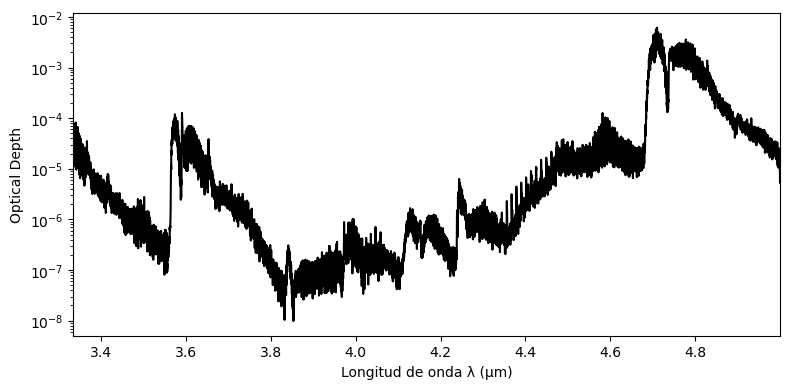

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# 1) obtén tu lista de odArray
dodl_list = lbl2od(mls, dll['O3'])

# 2) escoge el odArray que quieras graficar (aquí tomo el primero)
dodl = dodl_list[0]

# 3) extrae su grilla (en cm⁻¹) y su optical depth
nu  = dodl.grid()  # grilla de wavenumbers [cm⁻¹]
tau = dodl[:]      # optical depth (adimensional)

# 4) conviértelo a wavelength en µm
lam = 1e4 / nu     # λ en µm

# 5) órdenalo porque 1e4/nu invierte el orden
idx    = np.argsort(lam)
lam_s  = lam[idx]
tau_s  = tau[idx]

# 6) dibuja:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(lam_s, tau_s, '-k')
ax.set_yscale('log')
ax.set_xlabel("Longitud de onda λ (µm)")
ax.set_ylabel("Optical Depth")
ax.set_xlim(lam_s.min(), lam_s.max())
plt.tight_layout()
plt.show()


## ***Transmittance***

 lbl2od:   20 levels atmosphere  H2O CO2 O3 N2O CO CH4 N2 O2 and 22601 lines of ['H2O']

 lbl2xs:  H2O       18.02amu 22601 lines @ reference p [g/cm/s**2]  1.013e+06      T [K] 296.00  ---> 20 p,T pairs 
 cross section  H2O      22601 lines      1013mb  294.2K  10.0        4249     0.19sec     1.94ns:  2.85089e-25 < xs < 3.37117e-21
 cross section  H2O      22601 lines       902mb  289.7K  10.0        4721     0.25sec     2.31ns:  2.38319e-25 < xs < 3.48471e-21
 cross section  H2O      22601 lines       802mb  285.2K  10.0        5249     0.24sec     2.01ns:  1.98856e-25 < xs < 3.57305e-21
 cross section  H2O      22601 lines       710mb  279.2K  10.0        5841     0.35sec     2.64ns:  1.618e-25 < xs < 3.53434e-21
 cross section  H2O      22601 lines       628mb  273.2K  10.0        6497     0.30sec     2.03ns:  1.31654e-25 < xs < 3.43893e-21
 cross section  H2O      22601 lines       554mb  267.2K  10.0        7249     0.18sec     1.11ns:  1.06951e-25 < xs < 3.25222e-21
 cross sect

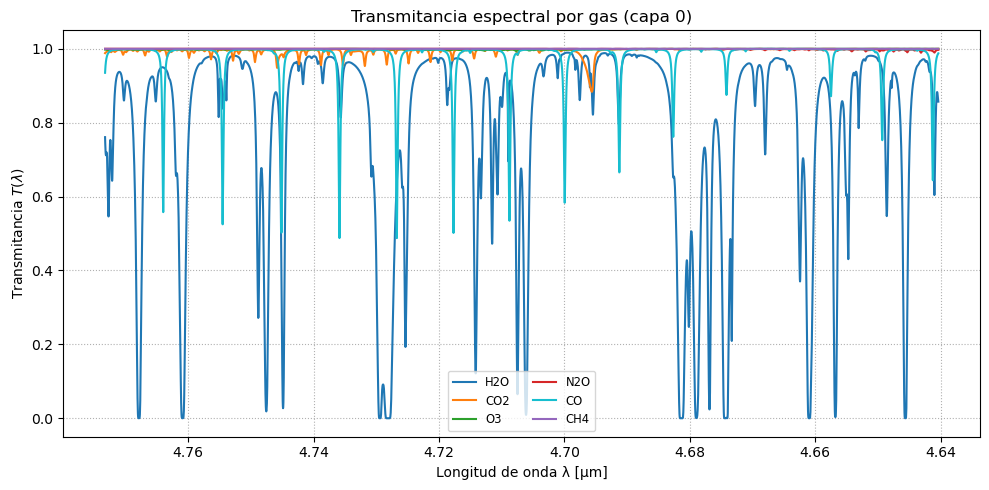

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Rango en número de onda (cm⁻¹)
vmin, vmax = 2100.0, 2150.0
extended = (vmin-5, vmax+5)

gases = ['H2O','CO2','O3','N2O','CO','CH4']
colors = {
    'H2O':'tab:blue','CO2':'tab:orange','O3':'tab:green',
    'N2O':'tab:red', 'CO':'tab:cyan','CH4':'tab:purple'
}

plt.figure(figsize=(10,5))

for gas in gases:
    # 1) Calcular la lista de odArray
    od_list = lbl2od(mls, dll[gas], extended)
    dodl    = od_list[0]        # capa de superficie (índice 0)

    # 2) Extraer tau y nu
    tau = dodl[:]               # τ(ν)
    nu  = dodl.grid()           # ν en cm⁻¹

    # 3) Calcular transmitancia
    T     = np.exp(-tau)        # T(ν)

    # 4) Convertir a λ en μm y ordenar
    lam = 1e4/nu
    idx = np.argsort(lam)
    lam_s = lam[idx]
    T_s   = T[idx]

    # 5) Plot
    plt.plot(lam_s, T_s,
             color=colors[gas],
             label=gas)

# Ajustes finales
plt.gca().invert_xaxis()           # λ crece de izq→der
plt.xlabel('Longitud de onda λ [μm]')
plt.ylabel('Transmitancia $T(λ)$')
plt.title('Transmitancia espectral por gas (capa 0)')
plt.legend(ncol=2, fontsize='small')
plt.grid(True, ls=':')
plt.tight_layout()
plt.show()


## ***Attenuation***

 lbl2od:   20 levels atmosphere  H2O CO2 O3 N2O CO CH4 N2 O2 and 22601 lines of ['H2O']

 lbl2xs:  H2O       18.02amu 22601 lines @ reference p [g/cm/s**2]  1.013e+06      T [K] 296.00  ---> 20 p,T pairs 
 cross section  H2O      22601 lines      1013mb  294.2K  10.0        4249     0.17sec     1.73ns:  2.85089e-25 < xs < 3.37117e-21
 cross section  H2O      22601 lines       902mb  289.7K  10.0        4721     0.13sec     1.24ns:  2.38319e-25 < xs < 3.48471e-21
 cross section  H2O      22601 lines       802mb  285.2K  10.0        5249     0.13sec     1.12ns:  1.98856e-25 < xs < 3.57305e-21
 cross section  H2O      22601 lines       710mb  279.2K  10.0        5841     0.14sec     1.05ns:  1.618e-25 < xs < 3.53434e-21
 cross section  H2O      22601 lines       628mb  273.2K  10.0        6497     0.13sec     0.92ns:  1.31654e-25 < xs < 3.43893e-21
 cross section  H2O      22601 lines       554mb  267.2K  10.0        7249     0.17sec     1.05ns:  1.06951e-25 < xs < 3.25222e-21
 cross sect

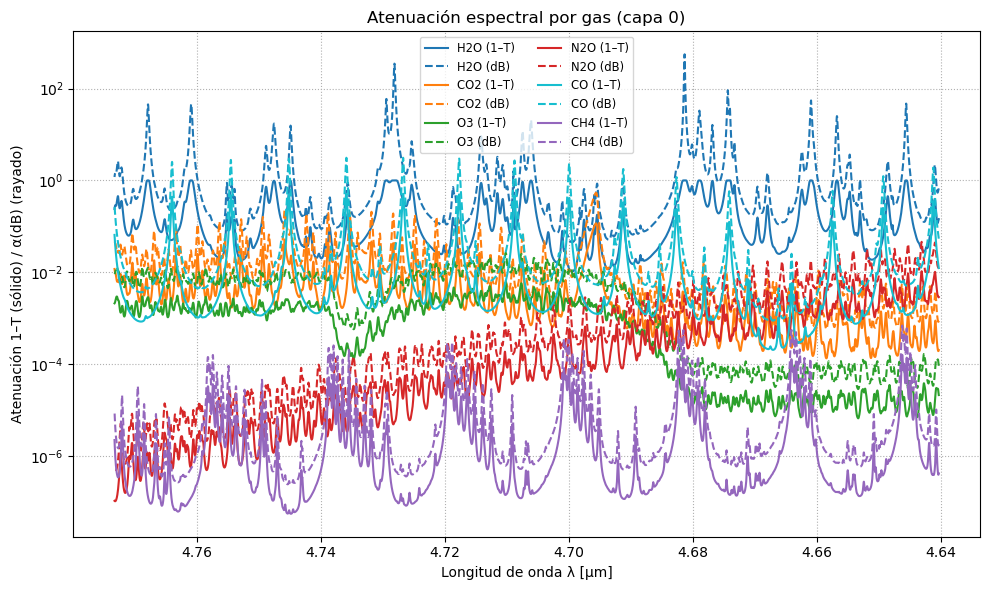

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Rango en número de onda (cm⁻¹)
vmin, vmax = 2100.0, 2150.0
extended = (vmin-5, vmax+5)

gases = ['H2O','CO2','O3','N2O','CO','CH4']
colors = {'H2O':'tab:blue','CO2':'tab:orange','O3':'tab:green',
          'N2O':'tab:red','CO':'tab:cyan','CH4':'tab:purple'}

plt.figure(figsize=(10,6))

for gas in gases:
    # 1) Calcula la lista de odArray (una por cada capa atmósférica)
    od_list = lbl2od(mls, dll[gas], extended)

    # 2) Quedémonos con la capa de superficie (índice 0) 
    dodl = od_list[0]

    # 3) Extrae de dodl el vector de tau y de nu:
    tau = dodl[:]       # τ(ν) [adimensional], dodl soporta slicing
    nu  = dodl.grid()   # ν  [cm⁻¹], igual que en lbl2xs

    # 4) Calcula la transmisión T y la atenuación α
    T     = np.exp(-tau)         # transferencia adimensional
    att   = 1.0 - T              # atenuación en fracción
    alpha = -10*np.log10(T)      # atenuación en dB

    # 5) Pasa a longitud de onda λ en µm
    lam = 1e4/nu  # cm⁻¹ → µm
    idx = np.argsort(lam)
    lam_s    = lam[idx]
    att_s    = att[idx]
    alpha_s  = alpha[idx]

    # 6) Elige qué curvas dibujar: attención lineal o dB
    plt.plot(lam_s, att_s,   color=colors[gas], linestyle='-',  label=f'{gas} (1–T)')
    plt.plot(lam_s, alpha_s, color=colors[gas], linestyle='--', label=f'{gas} (dB)')

# Ajustes finales
plt.gca().invert_xaxis()  # que λ crezca de izq→der
plt.yscale('log')         # escala log si lo deseas
plt.xlabel('Longitud de onda λ [μm]')
plt.ylabel('Atenuación 1–T (sólido) / α(dB) (rayado)')
plt.title('Atenuación espectral por gas (capa 0)')
plt.legend(ncol=2, fontsize='small')
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()
